In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now()}')

Päivitetty 2022-05-25 15:16:51.482981


<h1>Matplotlib - osa 1</h1>
<h2>Yksinkertainen pylväskaavio</h2>

Jos teen kaavion suoraan dataframesta (<b>df.plot...</b>), niin käytän pandas-kirjastoon matplotlibin pohjalta rakennettua "viritelmää" kaavion teosta.
Lue lisää https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html

Grafiikkaa varten tuon <b>matplotlib.pyplot</b>-kirjaston <b>plt</b>-nimisenä. Kirjastosta löytyy paljon funktioita grafiikan muotoiluun.
Lue lisää https://matplotlib.org/stable/api/pyplot_summary.html

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('https://taanila.fi/data1.xlsx')
df.head()

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN


In [4]:
# Lasken eri koulutuksen suorittaneiden lukumäärät
df1 = pd.crosstab(df['koulutus'], 'Lkm')
df1.index = ['Peruskoulu', '2. aste', 'Korkeakoulu', 'Ylempi korkeakoulu']
df1.columns.name = ''
df1

,Lkm
Peruskoulu,27
2. aste,30
Korkeakoulu,22
Ylempi korkeakoulu,2


<h2>Vaakapylväskaavio</h2>

Teen äsken luomastani dataframesta vaakapylväskaavion <b>plot</b>-toiminnolla. Plot-toiminnolla voin luoda eri kaaviolajeja, esimerkiksi pystypylväskaavion <b>bar</b> tai vaakapylväskaavion <b>barh</b>.

<AxesSubplot:>

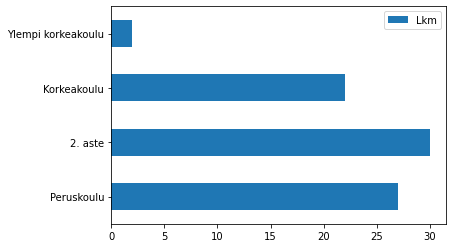

In [5]:
df1.plot.barh()

<h2>Kaavion tekstit</h2>


Mielestäni yhden arvosarjan kaavioissa selite on tarpeeton, joten piilotan sen <b>legend</b>-parametrilla.

Kaavion otsikoksi (<b>title</b>) annan 'Koulutusjakauma'.

Arvoakselin otsikoksi (<b>xlabel</b>) annan 'Lukumäärä'. 

Text(0.5, 0, 'Lukumäärä')

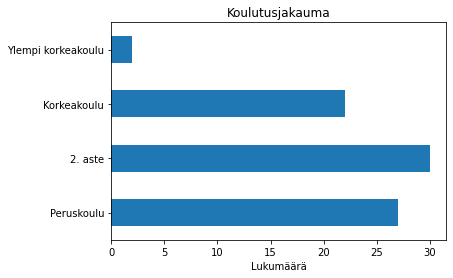

In [6]:
df1.plot.barh(legend = False)

plt.title('Koulutusjakauma')
plt.xlabel('Lukumäärä')

<h2>Hienosäätöä</h2>

Lisään x-akselin jakoviivojen mukaisen taustaviivoituksen (<b>grid</b>). Taustaviivoitus menee oletuksena pylväiden päälle, mutta asia korjaantuu parametrilla <b>zorder = 2</b>.

Häivytän y-akselin jakoviivat <b>tick_params</b>-toiminnolla.

Lisään pylväiden pituuksia vastaavat lukumäärät pylväiden viereen. Käytän tähän <b>text</b>-toimintoa, jolla voin lisätä kaavioon tekstejä:

<ul>
<li>Käytän apuna <b>for</b>-silmukkaa, jolla käyn läpi kaavion pylväät (<b>patches</b>-kokoelma) yksi kerrallaan.</li>
<li>Kaavioon pääsen käsiksi <b>gca</b>-toiminnolla (get current axes).</li>
<li>Vaakasuuntaisen pylvään pituuden saan <b>get_width</b>-toiminnolla.</li>
<li>Vaakasuuntaisen pylvään alareunan sijainnin saan <b>get_y</b>-toiminnolla.</li>
<li>Pylvään alareunan sijaintiin lisään puolet pylvään paksuudesta (<b>get_height</b>).</li>
<li>Pylvään viereen lisättävän lukumäärän muotoilen desimaalittomaksi ja sijoitan <b>label</b>-nimiseen muuttujaan.</li>
<li>Lisättävän merkkijonon sijainti määrittyy <b>x</b>:n ja <b>y</b>:n mukaan.</li> 
<li>Parametri <b>s</b> tarkoittaa lisättävää merkkijonoa, joka tässä tapauksessa sisältää välilyönnin ja pylvään pituutta kuvaavan lukumäärän.</li>
<li><b>va</b> tarkoittaa pystysuuntaista tasausta (vertical alignment).</li>
</ul>

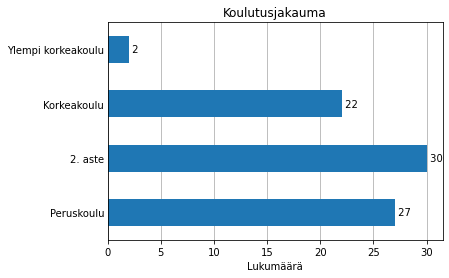

In [7]:
df1.plot.barh(legend = False, zorder = 2)

plt.title('Koulutusjakauma')
plt.xlabel('Lukumäärä')

plt.grid(axis = 'x')
plt.tick_params(axis = 'y', length = 0)

#for bar in plt.gca().patches:
#    x = bar.get_width()
#    y = bar.get_y() + bar.get_height() / 2
#    label = '{:.0f}'.format(x)
#    plt.text(x = x, y = y, s = ' ' + label, va = 'center')

for i, v in enumerate(df1['Lkm']):
    plt.text(v, i, ' '+str(v), va='center')

<h2>Pystypylväskaavio</h2>

Pienin muutoksin voin toteuttaa edellisen pystypylväskaaviona.

<ul>
    <li>Huomaa luokka-akselin otsikoiden 45 asteen kääntö (<b>rotation</b>).</li>
<li>Huomaa pylvään pituuksia vastaavien lukuarvojen siirto hieman ylöspäin (<b>y = y + 0.3</b>), koska muuten lukuarvot olisivat pylväissä kiinni.</li>

<li><b>ha</b> tarkoittaa vaakasuuntaista tasausta (horizontal alignment).</li>
<li>Huomaa, että yläreunaan on lisätty hieman tilaa skaalamalla arvoakseli (<b>ylim(0, 35)</b>).</li>
</ul>

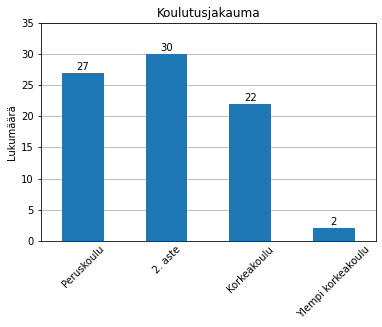

In [8]:
df1.plot.bar(legend = False, rot = 45, zorder = 2)

plt.title('Koulutusjakauma')
plt.ylabel('Lukumäärä')

plt.grid(axis = 'y')
plt.tick_params(axis = 'x', length = 0)
plt.ylim(0, 35)

#for bar in plt.gca().patches:
#    x = bar.get_x() + bar.get_width() / 2
#    y = bar.get_height()
#    label = '{:.0f}'.format(y)
#    plt.text(x = x, y = y + 0.3, s = label, va = 'bottom', ha = 'center')

for i, v in enumerate(df1['Lkm']):
    plt.text(i, v+0.5, str(v), ha='center')

<h2>Prosenttien esittäminen</h2>

In [9]:
# Luon dataframen, jossa prosentit
df2 = pd.crosstab(df['koulutus'], 'Lkm')
df2['%'] = df2['Lkm'] / df2['Lkm'].sum() * 100
df2.index = ['Peruskoulu', '2. aste', 'Korkeakoulu', 'Ylempi korkeakoulu']
df2.columns.name = ''
df2

,Lkm,%
Peruskoulu,27,33.333333
2. aste,30,37.037037
Korkeakoulu,22,27.160494
Ylempi korkeakoulu,2,2.469136


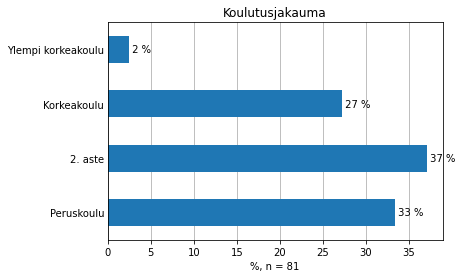

In [10]:
df2['%'].plot.barh(zorder = 2)

plt.title('Koulutusjakauma')

# Pienellä kikkailulla saan n-arvon akselin otsikkoon
plt.xlabel('%, n = ' + str(df2['Lkm'].sum()))

plt.grid(axis = 'x')
plt.tick_params(axis = 'y', length = 0)

for bar in plt.gca().patches:
    x = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    label = '{:.0f} %'.format(x)
    plt.text(x = x, y = y, s = ' ' + label, va = 'center')

<h2>Kaavion tallennus</h2>

Kun tallennan kaavion <b>savefig</b>-toiminnolla, niin tarkkaan ottaen tallennan kuvion (<b>figure</b>), jonka sisällä kaavio on. Kuvioon pääsen käsiksi <b>plt.gcf</b>-toiminnolla (get current figure).

Ilman parametria <b>bbox_inches = 'tight'</b> osia kaavion reunoilta voi jäädä tallentumatta.

Tallennusmuoto määräytyy  tiedostonimen tarkentimen (esim. png) perusteella. Mahdolliset tallennusmuodot selviävät komennolla <b>plt.gcf().canvas.get_supported_filetypes()</b>

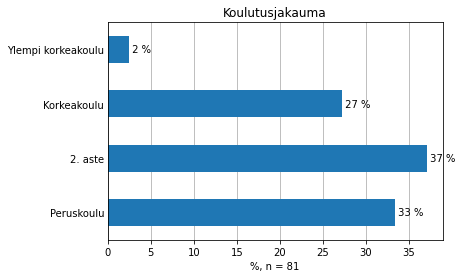

In [11]:
df2['%'].plot.barh(zorder = 2)

plt.title('Koulutusjakauma')
plt.xlabel('%, n = ' + str(df2['Lkm'].sum()))

plt.grid(axis = 'x')
plt.tick_params(axis = 'y', length = 0)

for bar in plt.gca().patches:
    x = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    label = '{:.0f} %'.format(x)
    plt.text(x = x, y = y, s = ' ' + label, va = 'center')

# Tallennus
plt.gcf().savefig('testi1.png', bbox_inches = 'tight')

<h2>Lisätietoa</h2>

Matplotlib - osa 2 käsittelee useamman arvosarjan pylväskaavioita:
https://nbviewer.jupyter.org/github/taanila/kaaviot/blob/master/matplotlib2.ipynb